

## Vehicle Driver Drowsiness Detection with Deep Learning on Neural Networks

In [118]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import pathlib


In [119]:
#load driver face image dataset

from google.colab import drive
drive.mount('/content/drive')
labels = os.listdir("/content/drive/My Drive/sleep/train/")
dataset = pd.read_csv('/content/drive/My Drive/sleep/Vehicle_Steering.csv',encoding='ISO-8859-1')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# labels

In [120]:
labels

['Open', 'no_yawn', 'yawn', 'prediction-images', 'Closed']

In [121]:
dataset.head()

,vehicle_type,frequency_right_angle_movement,frequency_left_angle_movement,frequency_steering_sudden_changes,target
0,car,200,220,5,1
1,bus,190,240,10,1
2,truck,150,190,3,0
3,Jeep,190,120,4,0
4,car,200,150,2,0


# visualize random 1 image

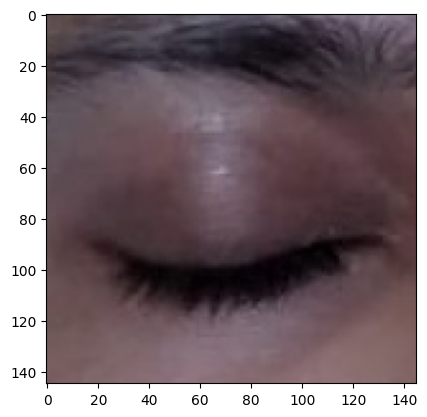

In [122]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/content/drive/My Drive/sleep/train/Closed/_0.jpg"))

# image array

In [123]:
a = plt.imread("/content/drive/My Drive/sleep/train/yawn/10.jpg")

# image shape

In [124]:
a.shape

(480, 640, 3)

# visualize yawn image.
# Here background is unnecessary.need only face image array

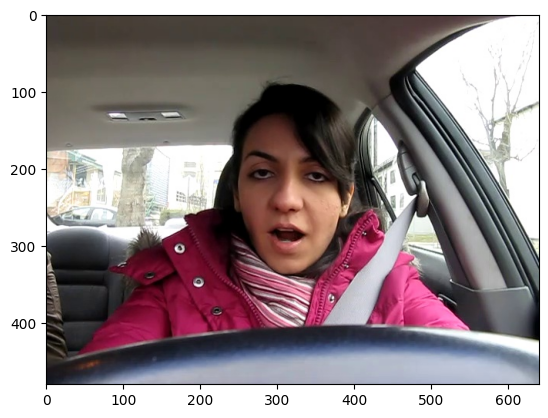

In [125]:
plt.imshow(plt.imread("/content/drive/My Drive/sleep/train/yawn/10.jpg"))

# for yawn and not_yawn. Take only face

In [126]:
def face_for_yawn(direc="/content/drive/My Drive/sleep/train",
                  face_cas_path="/content/drive/My Drive/sleep/prediction-images/haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]

    # Load Haar cascade
    face_cascade = cv2.CascadeClassifier(face_cas_path)
    if face_cascade.empty():
        print("Error: Haar cascade file not loaded. Check the path.")
        return []

    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(f"Processing category: {category} ({class_num1})")

        for image in os.listdir(path_link):
            image_path = os.path.join(path_link, image)
            image_array = cv2.imread(image_path, cv2.IMREAD_COLOR)

            if image_array is None:
                print(f"Warning: Could not read image {image_path}. Skipping.")
                continue  # Skip invalid images

            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)

            if len(faces) == 0:
                print(f"No faces detected in {image}. Skipping.")
                continue  # Skip images with no detected faces

            for (x, y, w, h) in faces:
                roi_color = image_array[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])

    return yaw_no

# Run the function
yawn_no_yawn = face_for_yawn()


Error: Haar cascade file not loaded. Check the path.


# for closed and open eye

In [127]:
def get_data(dir_path="/content/drive/My Drive/sleep/train/",
             face_cas="/content/drive/My Drive/sleep/prediction-images/haarcascade_frontalface_default.xml",
             eye_cas="/content/drive/My Drive/sleep/prediction-images//haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [128]:
data_train = get_data()

2
3


# extend data and convert array

In [129]:
def append_data():
#     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)

# new variable to store

In [130]:
import numpy as np
import cv2

def append_data():
    yaw_no = []
    data = get_data()

    for item in data:
        if isinstance(item, list):  # Ensure it's a valid image list
            img = np.array(item[0], dtype=np.float32)  # Convert image to NumPy
            label = item[1]  # Get the label
            yaw_no.append([img, label])

    # Convert to proper NumPy array with padding if needed
    images = np.array([x[0] for x in yaw_no])
    labels = np.array([x[1] for x in yaw_no])

    return images, labels

# Run function
X, y = append_data()
print("Shape of images:", X.shape)
print("Shape of labels:", y.shape)


2
3
Shape of images: (10, 145, 145, 3)
Shape of labels: (10,)


# separate label and features

In [131]:
data = face_for_yawn()  # Make sure data is assigned

if not data:  # Check if data is empty
    print("Error: No data returned from face_for_yawn()")
else:
    X = []
    y = []
    for feature, label in data:
        X.append(feature)
        y.append(label)

    # Convert lists to NumPy arrays for model training
    import numpy as np
    X = np.array(X)
    y = np.array(y)

    print("Shape of X:", X.shape)
    print("Shape of y:", y.shape)


Error: Haar cascade file not loaded. Check the path.
Error: No data returned from face_for_yawn()


# reshape the array

In [132]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

# LabelBinarizer

In [133]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

# label array

In [134]:
y = np.array(y)

# train test split

In [135]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

# length of X_test

In [136]:
len(X_test)

3

# Not necessary, only use to matching with my pc version

In [137]:
# !pip install tensorflow==2.3.1
# !pip install keras==2.4.3

# import some dependencies

In [138]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# tensorflow version

In [139]:
tf.__version__

'2.18.0'

# keras version

In [140]:
import keras
keras.__version__

'3.8.0'

# Data Augmentation

In [141]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

# Model

In [142]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 143, 143, 256)  │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 71, 71, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 69, 69, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 34, 34, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 495,140 (1.89 MB)

 Trainable params: 495,140 (1.89 MB)

 Non-trainable params: 0 (0.00 B)

In [143]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # <--- this is the fix
    metrics=['accuracy']
)


In [144]:
history = model.fit(train_generator, epochs=25, validation_data=test_generator, shuffle=True)


Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.0000e+00 - loss: 1.3504 - val_accuracy: 0.3333 - val_loss: 1.1397
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4286 - loss: 1.0753 - val_accuracy: 0.3333 - val_loss: 0.9108
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5714 - loss: 0.6860 - val_accuracy: 0.3333 - val_loss: 0.7343
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.7143 - loss: 0.8606 - val_accuracy: 1.0000 - val_loss: 0.5311
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4286 - loss: 0.8989 - val_accuracy: 0.6667 - val_loss: 0.4661
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2857 - loss: 1.3140 - val_accuracy: 0.6667 - val_loss: 0.4885
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4286 - loss: 0.8876 - val_accuracy: 0.6667 - val_loss: 0.4983
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5714 - loss: 0.8607 - val_accuracy: 0.6667 - val_loss: 0.5692
Epoch 9/25
1/1 ━━━━━━━━

# history

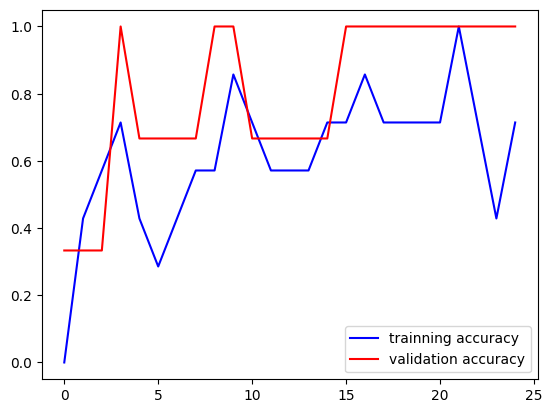

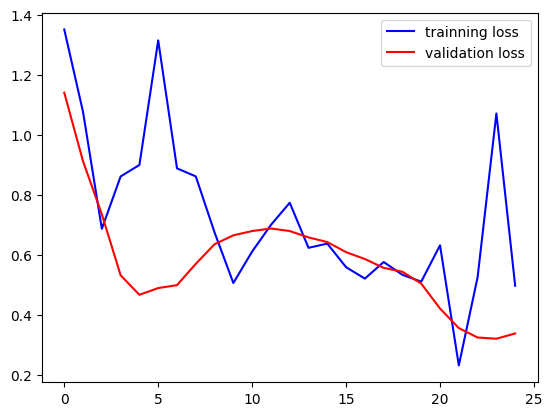

In [145]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

# save model

In [146]:
model.save("drowiness_new_1.keras")

In [147]:
model.save("drowiness_new6_2.keras")

# Prediction

In [148]:
predict_x=model.predict(X_test)
prediction=np.argmax(predict_x,axis=1)

#prediction = model.predict_classes(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


In [149]:
prediction

array([1, 0, 1])

# classification report

In [150]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

In [151]:
from sklearn.metrics import classification_report


# predicting function

In [152]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145
def prepare(filepath, face_cas="/content/drive/My Drive/sleep/prediction-images/haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("./drowiness_new_1.h5")















63




















++++++-.369*02# Prediction
## 0-yawn, 1-no_yawn, 2-Closed, 3-Open

Objective: Prediction based on Psychological activities(Yawn,No_yawn) : 0,1

Objective : Drowsy detection : 2-closed

Objective : Validating reults with differant data



In [153]:
# prepare("../input/drowsiness-dataset/train/no_yawn/1068.jpg")
prediction = model.predict([prepare("/content/drive/My Drive/sleep/train/no_yawn/1006.jpg")])
np.argmax(prediction)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=('Tensor(shape=(1, 145, 145, 3))',)
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


np.int64(0)

In [154]:
prediction0 = model.predict([prepare("/content/drive/My Drive/sleep/train/Closed/_1.jpg")])
np.argmax(prediction0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


np.int64(0)

In [155]:
prediction1 = model.predict([prepare("/content/drive/My Drive/sleep/train/Closed/_0.jpg")])
np.argmax(prediction1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


np.int64(0)

In [156]:
prediction2 = model.predict([prepare("/content/drive/My Drive/sleep/train/Open/_101.jpg")])
np.argmax(prediction2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


np.int64(1)

In [157]:
prediction3 = model.predict([prepare("/content/drive/My Drive/sleep/train/yawn/101.jpg")])
np.argmax(prediction3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


np.int64(1)

In [158]:
print("Objective 3:  Steering wheel based drowsiness detection")

Objective 3:  Steering wheel based drowsiness detection


In [159]:
dataset["target"].describe()

,target
count,100.000000
mean,0.620000
std,0.487832
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [160]:
dataset.head()

,vehicle_type,frequency_right_angle_movement,frequency_left_angle_movement,frequency_steering_sudden_changes,target
0,car,200,220,5,1
1,bus,190,240,10,1
2,truck,150,190,3,0
3,Jeep,190,120,4,0
4,car,200,150,2,0


In [161]:
dataset["target"].unique()

array([1, 0])

In [162]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("vehicle_type",axis=1)

target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [163]:
predictors
prediction_var=predictors

In [164]:
X_train.shape

(80, 4)

In [165]:
X_test.shape

(20, 4)

In [166]:
Y_train.shape

(80,)

In [167]:
Y_test.shape

(20,)

In [168]:
from sklearn.metrics import accuracy_score

In [169]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [170]:
Y_pred_lr.shape

(20,)

In [171]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

In [172]:
print("The accuracy score is: "+str(score_lr)+" %")

The accuracy score is: 100.0 %


In [173]:
#ML library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [174]:
train,test=train_test_split(dataset,test_size=0.3)
print(train.shape)
print(test.shape)

(70, 5)
(30, 5)


In [175]:
#prediction variables
prediction_var=['frequency_right_angle_movement','frequency_left_angle_movement','frequency_steering_sudden_changes']

In [176]:
prediction_var

['frequency_right_angle_movement',
 'frequency_left_angle_movement',
 'frequency_steering_sudden_changes']

In [177]:
#TRAINING DATA
#input training data for  steering wheel
train_X=train[prediction_var]
#output training data
train_Y=train['target']

In [178]:
#input training data for  steering wheel
train_X=train[prediction_var]
#output training data
train_Y1=train['frequency_right_angle_movement']

In [179]:
#input training data for  steering wheel
train_X=train[prediction_var]
#output training data
train_Z=train['frequency_left_angle_movement']

In [180]:
#TESTING DATA
#same steps for testing data
#input testing data for  steering wheel
test_X=test[prediction_var]
#output testing data
test_Y=test['target']

In [181]:
#same steps for testing data
#input testing data for  steering wheel
test_X=test[prediction_var]
#output testing data
test_Y1=test['frequency_right_angle_movement']

In [182]:
#same steps for testing data of  steering wheel
#input testing data  steering wheel
test_X=test[prediction_var]
#output testing data
test_Z=test['frequency_left_angle_movement']

In [183]:
#Training the model Status

model1=LogisticRegression()
model1.fit(train_X,train_Y)

LogisticRegression()

In [184]:
#Training the model for steering wheel

model_1=LogisticRegression()
model_1.fit(train_X,train_Z)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [185]:
#Training the model for  steering wheel

model_2=LogisticRegression()
model_2.fit(train_X,train_Y1)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [186]:
#Testing the algorithm  steering wheel
predicted_value=model1.predict(test_X)

In [187]:
#Testing the algorithm for  steering wheel
predicted_value_1=model_1.predict(test_X)

In [188]:
#Testing the algorithm for  steering wheel
predicted_value_2=model_2.predict(test_X)

In [189]:

#accuracy for  steering wheel
metrics.accuracy_score(test_Y1,predicted_value)
#prediction using  steering wheel
pd.DataFrame({'predicted_value':predicted_value_2,'KnowO/P of Stereing wheel Angles ':test_Y1})

,predicted_value,KnowO/P of Stereing wheel Angles
36,200,123
57,190,190
63,256,190
48,250,250
50,200,200
90,250,250
44,250,200
66,200,123
79,206,125
39,206,125


In [190]:
#prediction using steering wheel
print('1-Driver Sleepy, 0-Normal')
pd.DataFrame({'predicted_value':predicted_value,'Known O/P Whether Driver Drowsiness based on  steering wheel':test_Y})

1-Driver Sleepy, 0-Normal


,predicted_value,Known O/P Whether Driver Drowsiness based on steering wheel
36,0,0
57,1,1
63,0,0
48,1,1
50,1,1
90,1,1
44,0,0
66,0,0
79,0,0
39,0,0
